In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#Read the file
df = pd.read_csv(r'D:\0_Respaldo\0_Proyectos_2024\Henry_Labs\Lab2\Baires_Accidents\Data\comisarias-policia-de-la-ciudad.csv', encoding='Latin-1')

In [10]:
df.sample(3)

,long,lat,id,nombre,calle,altura,calle2,direccion,telefonos,observaciones,observaciones_2,barrio,comuna,codigo_postal,codigo_postal_argentino
0,-58.373245,-34.601906,1,Comisaria Vecinal 1-D,Lavalle,451,NaN,LAVALLE 451,4322-8033/8221,NaN,NaN,SAN NICOLAS,1,1047.0,C1047AAI
40,-58.468944,-34.683121,44,Comisaria Comunal 8,Ana Diaz,0,Cafayate,DIAZ ANA Y CAFAYATE,4605-2031/2090,NaN,NaN,VILLA LUGANO,8,NaN,NaN
39,-58.444068,-34.554822,52,Comisaria Comunal 13,Artilleros,2081,NaN,ARTILLEROS 2081,4784-4047/9940,NaN,NaN,BELGRANO,13,1428.0,C1428AUE


De estos datos trabajaremos con las columnas 'long' , 'lat', 'nombre' y 'comuna'

In [11]:
df1 = df[['lat','long','nombre','comuna']].copy()

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     49 non-null     float64
 1   long    49 non-null     float64
 2   nombre  49 non-null     object 
 3   comuna  49 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


In [13]:
df1.describe()

,lat,long,comuna
count,49.000000,49.000000,49.000000
mean,-34.612036,-58.435116,7.163265
std,0.031808,0.045130,4.642857
min,-34.683121,-58.524039,1.000000
25%,-34.629536,-58.472991,3.000000
50%,-34.616114,-58.439501,7.000000
75%,-34.591137,-58.394789,12.000000
max,-34.551103,-58.360588,15.000000


In [14]:
#Elimino los duplicados.
df1 = df1.drop_duplicates()

### Valores discretos

In [16]:
#Reviso si hay valores del fuera del rango de las comunas definidas.
df1['comuna'].value_counts()

comuna
1     8
4     5
12    5
3     4
6     3
14    3
13    3
8     3
10    3
5     2
2     2
15    2
7     2
9     2
11    2
Name: count, dtype: int64

In [17]:
#Busco valores no numericos
df1['comuna'].isna().sum()

0

### Valores Continuos
*Latitud y Longitud*

In [18]:
df1['lat'].isna().sum()

0

In [19]:
df1['long'].isna().sum()

0

In [21]:
#Modificamos los nombres
df1 = df1.rename(columns={'lat':'Latitud'})
df1 = df1.rename(columns={'long':'Longitud'})
df1 = df1.rename(columns={'comuna':'COMUNA'})
df1.head(3)

,Latitud,Longitud,nombre,COMUNA
0,-34.601906,-58.373245,Comisaria Vecinal 1-D,1
1,-34.628641,-58.424926,Comisaria Vecinal 5-B,5
2,-34.608979,-58.439501,Comisaria Vecinal 6-A,6


### Graficas


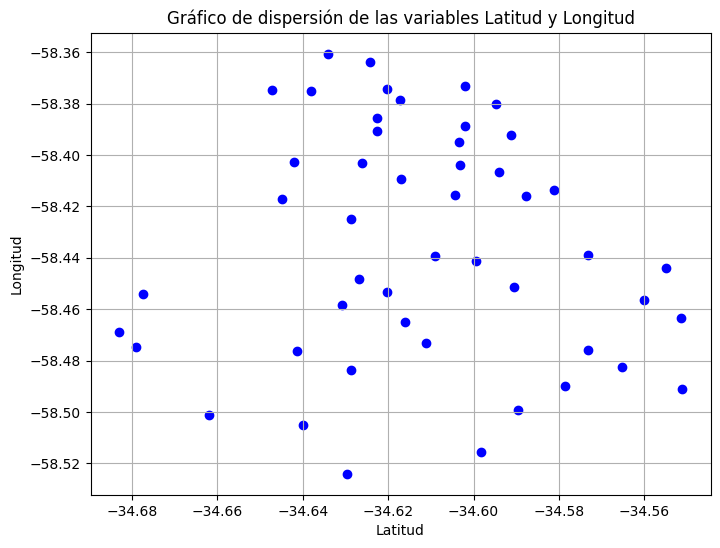

In [22]:
# Graficamos los puntos de referencia para verificar que se en cuentran dentro de lo esperado del mapa de Baires. 
# y que todos las cordenadas son numericas
plt.figure(figsize=(8, 6))
plt.scatter(df1['Latitud'], df1['Longitud'], color='blue', marker='o')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Gráfico de dispersión de las variables Latitud y Longitud')
plt.grid(True)
plt.show()

### Normalizacion

In [24]:
df1['nombre'].value_counts()

nombre
Comisaria Vecinal 1-D                      1
Comisaria Comunal 7                        1
Comisaria Vecinal 1-B                      1
Comisaria Vecinal 9-B                      1
Comisaria Comunal 11                       1
Comisaria Comunal 9                        1
Comisaria Comunal 10                       1
Comisaria Vecinal 10-B                     1
Comisaria Vecinal 11-B                     1
Comisaria Vecinal 11-B (edificio anexo)    1
Comisaria Vecinal 8-A                      1
Comisaria Vecinal 12-A                     1
Comisaria Comunal 3                        1
Comisaria Vecinal 7-C                      1
Comisaria Comunal 13                       1
Comisaria Comunal 8                        1
Comisaria Comunal 14                       1
Comisaria Vecinal 10-C                     1
Comisaria Vecinal 3-A                      1
Comisaria Vecinal 3-A (edificio anexo)     1
Comisaria Comunal 5                        1
Comisaria Comunal 12                       1
Com

### Exporto el archivo en parquet

In [25]:
df1.to_parquet(r"D:\0_Respaldo\0_Proyectos_2024\Henry_Labs\Lab2\Baires_Accidents\Data\Parquet\comisarias.parquet", index=False)